In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import time

AttributeError: module 'os' has no attribute 'ls'

In [31]:
# 데이터 불러오기
sales = pd.read_csv('./data/sales_train.csv')
items = pd.read_csv('./data/items.csv')
item_categories = pd.read_csv('./data/item_categories.csv')
shops = pd.read_csv('./data/shops.csv')
test = pd.read_csv('./data/test.csv')

## 1. 전처리

In [7]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [32]:
time_cut = time.time()
sales.date = sales.date.apply(lambda x : datetime.strptime(x,'%d.%m.%Y'))
print(-time_cut+time.time())
sales

20.4548921585083


In [ ]:
sales

In [6]:
sales.shape # (2935849, 6)

(2935849, 6)

In [7]:
sales.corr() # 상관계수

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


In [8]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


- 중복데이터 처리

In [9]:
sales = sales.drop_duplicates()
sales.shape  # (2935849, 6) -> (2935843, 6)

(2935843, 6)

- 특정 행 제거

In [10]:
# item_price 가 0 이하인 경우
(sales.item_price <= 0).sum()

1

In [12]:
sales = sales[sales.item_price > 0]

In [13]:
# 팔린 상품의 개수가 (-) 인 경우 -> 행 삭제?, 이전 주문과 함께 삭제
(sales['item_cnt_day'] < 0).sum()

7356

In [14]:
sales = sales[sales.item_cnt_day >= 0]

- 결측치 처리

In [15]:
# 결측치 없음
sales.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

- 이상치 처리

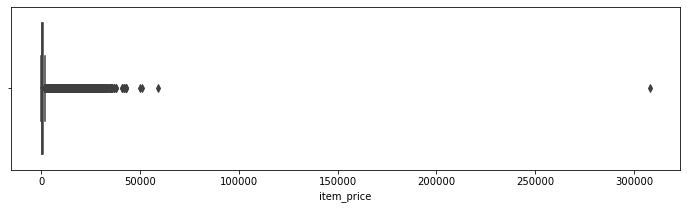

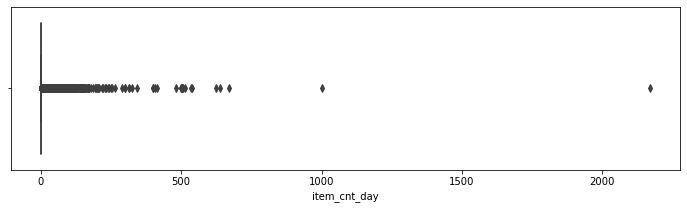

In [16]:
plt.figure(figsize=(12,3))
sns.boxplot(x='item_price', data=sales)
plt.figure(figsize=(12,3))
sns.boxplot(x='item_cnt_day', data=sales)
plt.show()

In [17]:
# 뚜렷한 이상치를 우선 제거 -> 분석하면서 확인하기
sales = sales[sales.item_cnt_day < 500]
sales = sales[sales.item_price < 50000]

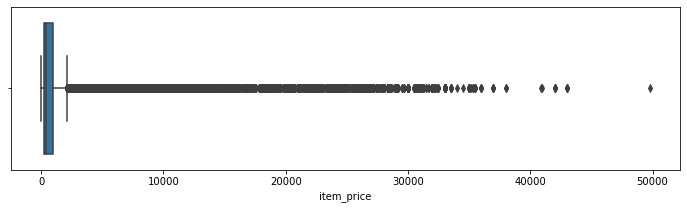

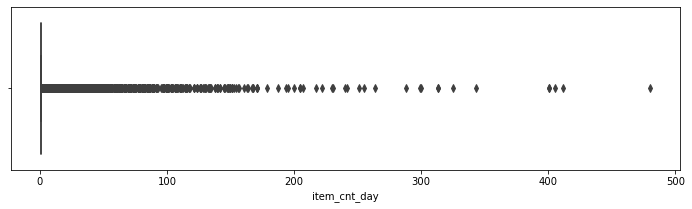

In [18]:
plt.figure(figsize=(12,3))
sns.boxplot(x='item_price', data=sales);
plt.figure(figsize=(12,3))
sns.boxplot(x='item_cnt_day', data=sales)

plt.show()

In [37]:
New = sales.date > datetime.

AttributeError: 'int' object has no attribute 'month'

In [81]:
sales[sales.date >= datetime.strptime('2015/02/21','%Y/%m/%d')].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days

2376.214285714286

In [94]:
sales[(sales.date >= datetime.strptime('2014/02/21','%Y/%m/%d')) & (sales.date <= datetime.strptime('2014/10/31','%Y/%m/%d'))].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days

3343.8492063492063

In [95]:
sales[(sales.date >= datetime.strptime('2013/02/21','%Y/%m/%d')) & (sales.date <= datetime.strptime('2013/10/31','%Y/%m/%d'))].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days

4089.8571428571427

In [122]:
a = []

In [125]:
a.append(sales[sales.date >= datetime.strptime('2015/02/21','%Y/%m/%d')].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days)

In [124]:
a.append(sales[(sales.date >= datetime.strptime('2014/02/21','%Y/%m/%d')) & (sales.date <= datetime.strptime('2014/10/31','%Y/%m/%d'))].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days)

In [123]:
a.append(sales[(sales.date >= datetime.strptime('2013/02/21','%Y/%m/%d')) & (sales.date <= datetime.strptime('2013/10/31','%Y/%m/%d'))].item_cnt_day.sum() / (sales.date.max()-datetime.strptime('2015/02/21','%Y/%m/%d')).days)

In [116]:
a = a.reverse()

In [126]:
a

[4089.8571428571427, 3343.8492063492063, 2376.214285714286]

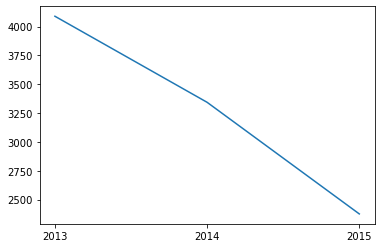

In [128]:
plt.plot(['2013','2014','2015'],a)

2014/2/28에 러시아 우크라이나 침공

2015/2/21에 러시아 신용등급 정크로 강등 https://biz.newdaily.co.kr/site/data/html/2015/02/21/2015022110022.html